In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
#importing the data and making a dataframe
data=pd.read_excel("sample_final.xlsx")

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299999 entries, 0 to 299998
Data columns (total 11 columns):
Random            299999 non-null float64
ad_instance_id    299999 non-null int64
segment_id_x      299999 non-null int64
place_id          299999 non-null int64
user_action_id    299999 non-null int64
action_time       299999 non-null int64
screen_height     299999 non-null int64
screen_width      299999 non-null int64
segment_id_y      299999 non-null int64
User_ID           299999 non-null int64
mac_address       299999 non-null int64
dtypes: float64(1), int64(10)
memory usage: 25.2 MB


In [38]:
data=data.drop("Random", axis=1)

In [39]:
data.user_action_id=np.where(data.user_action_id==1,1,0)

In [40]:
data.head()

,ad_instance_id,segment_id_x,place_id,user_action_id,action_time,screen_height,screen_width,segment_id_y,User_ID,mac_address
0,2021,6,9,0,0,667,375,11,223481,1
1,1108,6,47,0,1,667,375,4,795536,1
2,2747,6,27,0,0,640,360,5,938974,0
3,2237,6,77,0,0,640,360,11,111971,0
4,2306,14,46,0,0,640,360,4,421991,0


In [41]:
data["segment_id_x"]=data["segment_id_x"].astype(object)

In [42]:
click_rate_byID=data.groupby("segment_id_x")["user_action_id"].value_counts(normalize=True).rename("percentage").mul(100).reset_index()

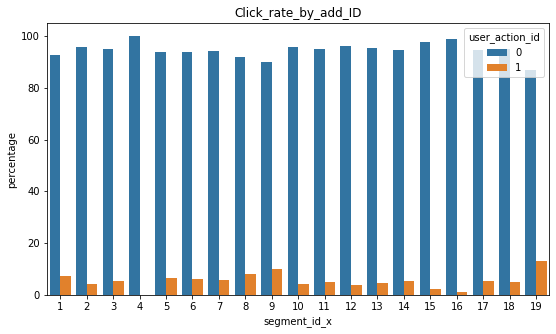

In [43]:
plt.figure(figsize=(9,5))
sns.barplot(x="segment_id_x",y="percentage", hue="user_action_id",data=click_rate)
plt.title("Click_rate_by_add_ID")
plt.show()

In [44]:
data["action_time"]=data["action_time"].astype(object)

In [45]:
click_rate_byT=data.groupby("action_time")["user_action_id"].value_counts(normalize=True).rename("percentage").mul(100).reset_index()

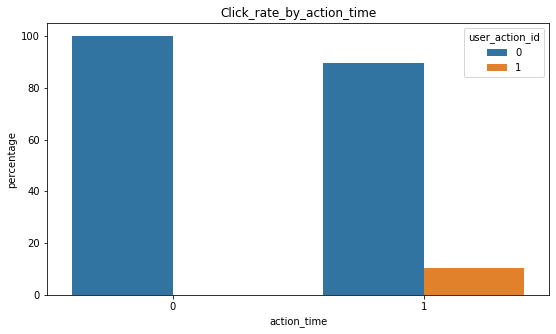

In [46]:
plt.figure(figsize=(9,5))
sns.barplot(x="action_time",y="percentage", hue="user_action_id",data=click_rate_byT)
plt.title("Click_rate_by_action_time")
plt.show()

In [47]:
data["mac_address"]=data["mac_address"].astype(object)

In [48]:
click_rate_byT=data.groupby("mac_address")["user_action_id"].value_counts(normalize=True).rename("percentage").mul(100).reset_index()

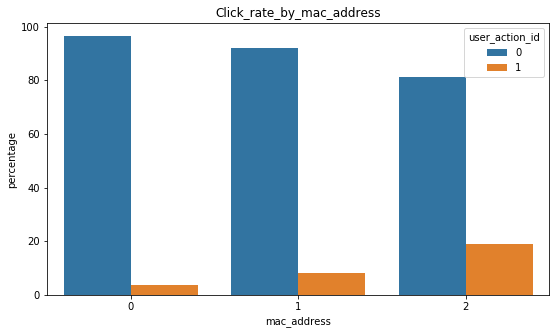

In [49]:
plt.figure(figsize=(9,5))
sns.barplot(x="mac_address",y="percentage", hue="user_action_id",data=click_rate_byT)
plt.title("Click_rate_by_mac_address")
plt.show()

In [50]:
mode_screen_height=data["screen_height"].mode()

In [51]:
 mode_screen_width=data["screen_width"].mode()

In [52]:
data.screen_height.replace([0], [mode_screen_height], inplace=True)

In [53]:
data.screen_width.replace([0], [mode_screen_width], inplace=True)

In [54]:
data["Screen_Area"]=data["screen_height"]*data["screen_width"]

In [55]:
data.head()

,ad_instance_id,segment_id_x,place_id,user_action_id,action_time,screen_height,screen_width,segment_id_y,User_ID,mac_address,Screen_Area
0,2021,6,9,0,0,667,375,11,223481,1,250125
1,1108,6,47,0,1,667,375,4,795536,1,250125
2,2747,6,27,0,0,640,360,5,938974,0,230400
3,2237,6,77,0,0,640,360,11,111971,0,230400
4,2306,14,46,0,0,640,360,4,421991,0,230400


In [56]:
data=data.drop({"screen_height","screen_width"}, axis=1)

In [59]:
data.head()

,ad_instance_id,segment_id_x,place_id,user_action_id,action_time,segment_id_y,User_ID,mac_address,Screen_Area
0,2021,6,9,0,0,11,223481,1,250125
1,1108,6,47,0,1,4,795536,1,250125
2,2747,6,27,0,0,5,938974,0,230400
3,2237,6,77,0,0,11,111971,0,230400
4,2306,14,46,0,0,4,421991,0,230400


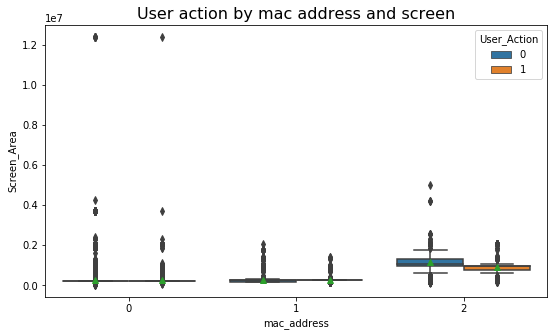

In [60]:
plt.figure(figsize=(9,5))
sns.boxplot(x="mac_address", y="Screen_Area", data=data, showmeans=True, hue="user_action_id")
plt.legend(title='User_Action', loc='upper right')
plt.xlabel("mac_address")
plt.ylabel("Screen_Area")
plt.title("User action by mac address and screen area",fontdict={"fontsize":16})
plt.show()

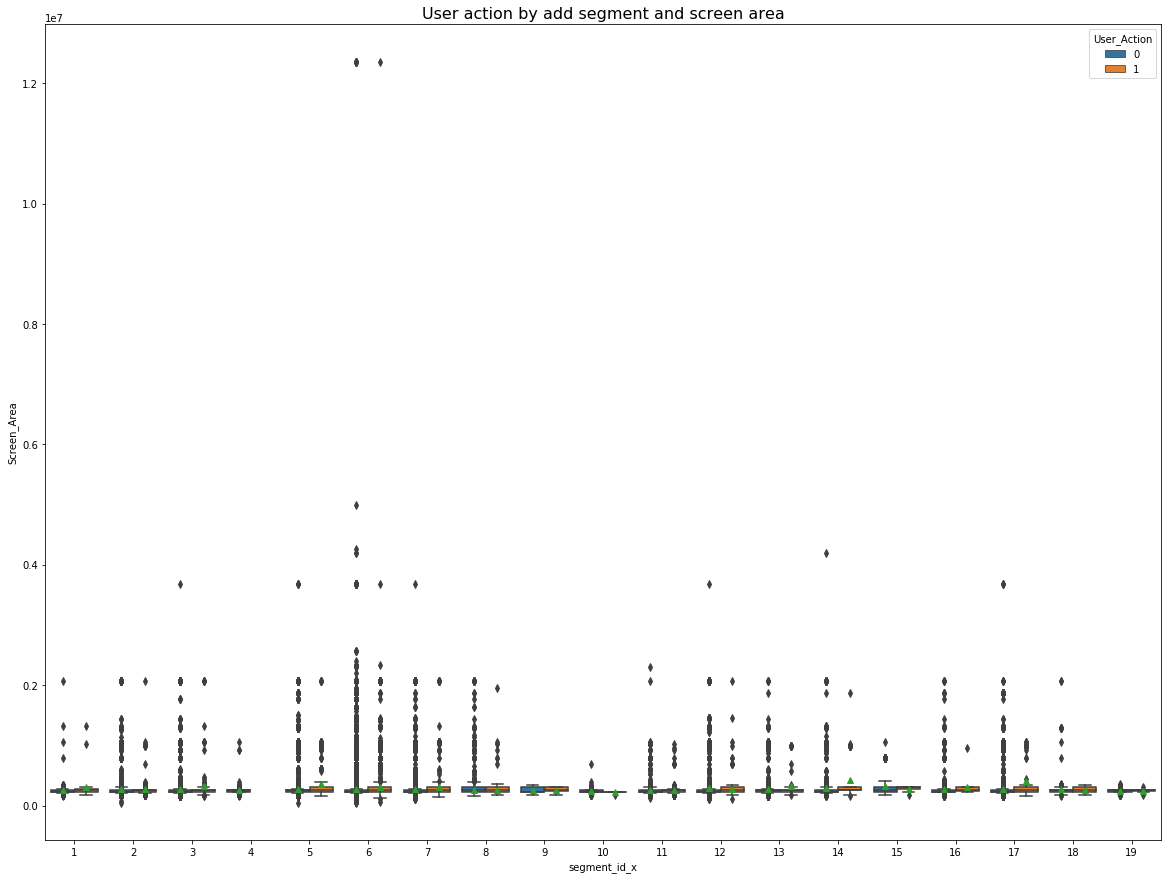

In [62]:
plt.figure(figsize=(20,15))
sns.boxplot(x="segment_id_x", y="Screen_Area", data=data, showmeans=True, hue="user_action_id")
plt.legend(title='User_Action', loc='upper right')
plt.xlabel("segment_id_x")
plt.ylabel("Screen_Area")
plt.title("User action by add segment and screen area",fontdict={"fontsize":16})
plt.show()